# Dynamic WSCC 9-bus System with Switch

In [4]:
from villas.dataprocessing.dpsim import *
from villas.dataprocessing.plottools import *

### Read log files and list all column names

In [5]:
path = '../../dpsim/Logs/'
logName = 'WSCC-9bus_dyn_switch_LeftVector'
logFilename = path + logName + '.csv'
print(logFilename)

ts_dpsim = read_timeseries_dpsim(logFilename)

../../dpsim/Logs/WSCC-9bus_dyn_switch_LeftVector.csv
DPsim results real column names: []
DPsim results complex column names: ['node00000', 'node00001', 'node00002', 'node00003', 'node00004', 'node00005', 'node00006', 'node00007', 'node00008', 'node00009', 'node00010', 'node00011', 'node00012', 'node00013', 'node00014', 'node00015', 'node00016', 'node00017', 'node00018', 'node00019', 'node00020', 'node00021', 'node00022', 'node00023', 'node00024', 'node00025', 'node00026']
DPsim results variable number: 27
DPsim results length: 1000


### Phasors at first time step

In [6]:
phasors = get_node_voltage_phasors(ts_dpsim)
for node, phasor in phasors.items():
    print(node + ': ' + str(phasor['abs'].values[0]) + '<' + str(phasor['phase'].values[0]))

node00000: 14143.999223733577<4.857469980723884
node00001: 218644.34370811793<-4.16251154962029
node00002: 222216.6918682762<-3.761450136358205
node00003: 229023.73086996778<-2.326825040774141
node00004: 17159.47056475069<-0.014699889602934687
node00005: 18448.55716334738<9.668739871400525
node00006: 229396.2785662104<3.947308347853774
node00007: 230944.15963310306<2.081339740271138
node00008: 225188.5562379864<0.8091640551572143
node00009: 17958.442476259694<2.2268969871352695
node00010: 6364.466720254887<131.80217705868733
node00011: 19871.80075683379<19.629700584806198
node00012: 9316.880603755422<171.56700920828717
node00013: 15228.078745852215<12.71192065821014
node00014: 6615.024053416132<160.52281714220712
node00015: 219638.3226738394<-4.4466566295983
node00016: 223465.55859377168<-4.02092463599404
node00017: 223011.06012393555<4.281159905835248
node00018: 227898.7796507408<4.037414842345308
node00019: 230282.96365872337<2.232337007198375
node00020: 225522.4638207816<2.340674310

### Phasors at last time step

In [7]:
for node, phasor in phasors.items():
    print(node + ': ' + str(phasor['abs'].values[-1]) + '<' + str(phasor['phase'].values[-1]))

node00000: 3720.705855561986<14.150951905365948
node00001: 138442.39189553756<-4.267838354096793
node00002: 97926.97700420706<-7.323328115625114
node00003: 155418.49634275085<-3.6234871503747788
node00004: 14443.91186708477<-0.07344585102451956
node00005: 13302.54429544213<14.109816942374067
node00006: 127482.39033464229<8.273846524635866
node00007: 216.0501732569553<-73.2444259869997
node00008: 72773.16916683459<5.998193014379891
node00009: 17958.447677908534<2.2599222187101975
node00010: 21175.429812351886<101.85304205808802
node00011: 19871.792213996807<19.740648071056203
node00012: 13530.42838642236<128.99197704745615
node00013: 15228.085440886816<14.308289689042029
node00014: 6091.443904011758<153.19279447483254
node00015: 138921.03013960845<-5.110895485591522
node00016: 101873.21635865337<-12.660931769573212
node00017: 122098.56212876752<6.927848741879677
node00018: 126587.61054655428<10.472119447882296
node00019: 6219.46532081376<-76.67638404427015
node00020: 20399.93303816728<-

### Phasors at last time step in per unit

In [8]:
nominal_voltages = {'node00000': 13800, 'node00001': 230000, 'node00002': 230000, 
                    'node00003': 230000, 'node00004': 16500, 'node00005': 18000, 
                    'node00006': 230000, 'node00007': 230000, 'node00008': 230000} 
for node, nom_voltage in nominal_voltages.items():
    print(node + ': ' + str(phasors[node]['abs'].values[0] / nom_voltage) + '<' + str(phasors[node]['phase'].values[0]))

node00000: 1.024927479980694<4.857469980723884
node00001: 0.9506275813396432<-4.16251154962029
node00002: 0.9661595298620704<-3.761450136358205
node00003: 0.9957553516085556<-2.326825040774141
node00004: 1.0399679130151933<-0.014699889602934687
node00005: 1.0249198424081878<9.668739871400525
node00006: 0.9973751242009149<3.947308347853774
node00007: 1.0041050418830568<2.081339740271138
node00008: 0.9790806792955931<0.8091640551572143


### Plot node phase
The phase at node00007 is not initialized properly since the CIM load flow data is not accurate. Therefore, the steady-state initialization implemented in the MNA solver is executed first so that the initial phase at t=0 is already very close to the correct one.
Using PI-lines with parallel impedances to ground not only during the initialization but also the simulation or more accurate CIM load flow results would probably further improve the results because the values around node00007 have still not converged completely.

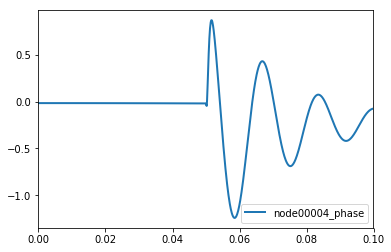

In [9]:
plot_timeseries(1, phasors['node00004']['phase'])

### Plot node voltages

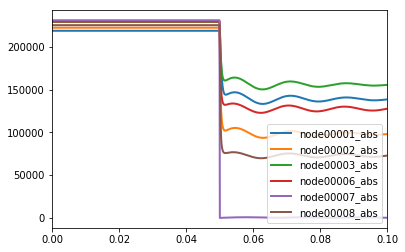

In [10]:
plot_timeseries(2, phasors['node00001']['abs'])
plot_timeseries(2, phasors['node00002']['abs'])
plot_timeseries(2, phasors['node00003']['abs'])
plot_timeseries(2, phasors['node00006']['abs'])
plot_timeseries(2, phasors['node00007']['abs'])
plot_timeseries(2, phasors['node00008']['abs'])
#plt.gca().axes.set_ylim([210000,240000])

The results for node00001 are very good.

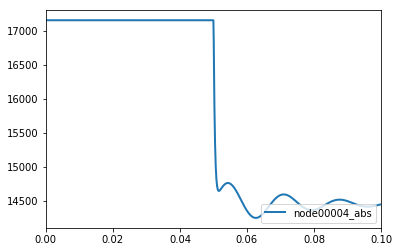

In [11]:
plot_timeseries(2, phasors['node00004']['abs'])